---
title: "Reddit API"
description: Extracción de datos usando la api de reddit
format: html
---

Este código utiliza la API de Reddit a través de la biblioteca `praw` para extraer datos del subreddit `'learnpython'   `. PRAW, acrónimo de "Python Reddit API Wrapper", es un paquete de Python que permite un acceso sencillo a la API de Reddit.


Para configurar las credenciales de autenticación de Reddit, debes crear un archivo de configuración llamado `praw.ini`. Este archivo debe estar ubicado en el mismo directorio que tu script.

El archivo `praw.ini` debe tener el siguiente formato:

```ini
[CREDENCIALES]
client_id=YOUR_CLIENT_ID
client_secret=YOUR_CLIENT_SECRET
password=YOUR_REDDIT_PASSWORD
username=YOUR_REDDIT_USERNAME
user_agent=YOUR_USER_AGENT
```

Asegúrate de reemplazar `YOUR_CLIENT_ID`, `YOUR_CLIENT_SECRET`, `YOUR_PASSWORD`, `YOUR_USERNAME` y `YOUR_USER_AGENT` con tus propias credenciales de Reddit.

Una vez que hayas creado y guardado este archivo, PRAW lo utilizará automáticamente para autenticar tus solicitudes a la API de Reddit.

In [1]:
import praw

reddit = praw.Reddit("CREDENCIALES")
subreddit = reddit.subreddit('lies')

Luego, obtiene los 500,000 posts principales del subreddit y almacena información relevante de cada post (título, puntuación, id, subreddit, url, número de comentarios, texto del post y fecha de creación) en una lista. 

In [2]:
posts = []
for post in subreddit.new(limit=3000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created, post.author, post.upvote_ratio, post.num_reports, post.mod_reports])


Finalmente, convierte esta lista en un DataFrame de pandas y muestra las primeras 10 filas del DataFrame.

In [3]:
import pandas as pd

df = pd.DataFrame(posts, columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','author','upvote_ratio', 'num_reports','mod_reports'])

df.to_csv('reddit_v4.csv', index=False)

df['created'] = pd.to_datetime(df['created'], unit='s')  # Se convierte la fecha a un formato legible

df.head(10)

,title,score,id,subreddit,url,num_comments,body,created,author,upvote_ratio,num_reports,mod_reports
0,This was the map of Europe in 1919,1,1g6kyyo,lies,https://i.redd.it/f3sxeknxajvd1.jpeg,0,,2024-10-18 15:35:59,TheSip69,1.00,None,[]
1,The lineup of the New Fantastic 4 is really co...,1,1g6kxyf,lies,https://i.redd.it/kz0pbeqrajvd1.jpeg,0,,2024-10-18 15:35:04,AskJeevesIsBest,1.00,None,[]
2,This is how America looks like after WW3,8,1g6j3mf,lies,https://i.redd.it/2lqn5bqnwivd1.jpeg,2,,2024-10-18 14:15:58,MilesAhXD,0.79,None,[]
3,I’m playing Valorant,2,1g6j15h,lies,https://i.redd.it/1odykr14wivd1.jpeg,0,,2024-10-18 14:12:56,Far_Departure_1580,1.00,None,[]
4,Camels and giraffes are the only animals,9,1g6it4r,lies,https://i.redd.it/yjjmtz4auivd1.png,0,,2024-10-18 14:02:52,Available-Zombie1208,1.00,None,[]
5,if you see evil ye YOU WILL DIE‼️!!!!!1!,36,1g6iqa3,lies,https://i.redd.it/lppnelnqtivd1.png,10,,2024-10-18 13:59:37,realweekdays133,0.98,None,[]
6,This image sucks,223,1g6idkr,lies,https://i.redd.it/uk85n4stqivd1.jpeg,9,,2024-10-18 13:43:16,Kiraethu,0.99,None,[]
7,Why did Mr breast do this?,134,1g6ht7q,lies,https://i.redd.it/eecokhzzlivd1.jpeg,5,,2024-10-18 13:16:15,Certifiedboykisser2,0.99,None,[]
8,I was banned from /r/lies for a post I'm going...,1,1g6dk96,lies,https://i.redd.it/ab12kz3tahvd1.png,0,,2024-10-18 08:53:14,ImmaRussian,1.00,None,[]
9,I'm fluent in spanish,3,1g6gqpf,lies,https://www.reddit.com/r/lies/comments/1g6gqpf...,1,,2024-10-18 12:22:24,bigbig-dan,1.00,None,[]


                   author  post_count
0       Organic-Smell4743          16
1     Nervous-Estate-1852          11
2     SavageFractalGarden           9
3                   d_-_p           8
4            Niteshade_YT           8
..                    ...         ...
689              Preeeeow           1
690             comfybuck           1
691              20195780           1
692          SpookyWeebou           1
693  Intelligent-Fuel1485           1

[694 rows x 2 columns]


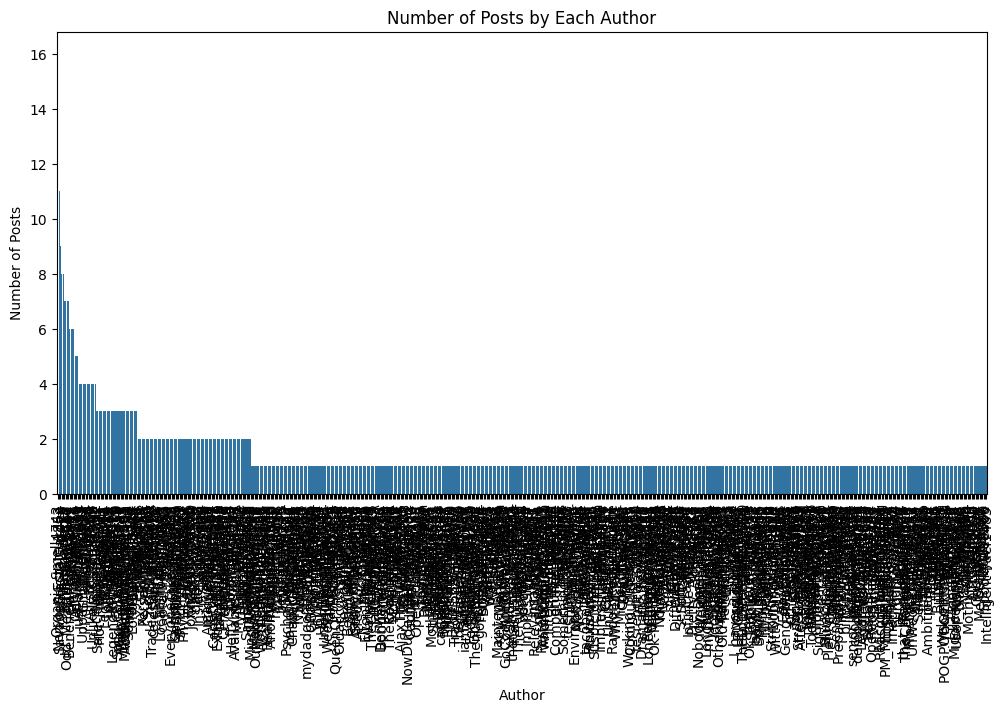

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 


# Calculate the number of posts by each author
author_counts = df['author'].value_counts().reset_index()
author_counts.columns = ['author', 'post_count']

# Display the DataFrame
print(author_counts)

# Plot the relationship between authors and their post counts
plt.figure(figsize=(12, 6))
sns.barplot(x='author', y='post_count', data=author_counts)
plt.title('Number of Posts by Each Author')
plt.xlabel('Author')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)  # Rotate author names for better readability
plt.show()

tipos de analisis

a) primer analisis temporal
- pandas
- numpy
- matplotlib
- seaborn 
b) agrupar para hacer los graficos
c) distribuciones, boxplot, etc XDXD

si no existen datos temporales no se pueden analizar

tres tipos de analisis minimo

la primera tarea es hacer un analisis exploratorio de dato (EDA en ingles)

en otro marco, analisis temporal, analisis de agrupacion, analisis de distribucion, 

ya se puede hacer un analisis de distribucion por autor



ratio: It's the ratio between upvotes and total votes. For example, if a post has 3 upvotes and 1 downvote, it has 75% upvote rate because 3 is 75% of 4. 

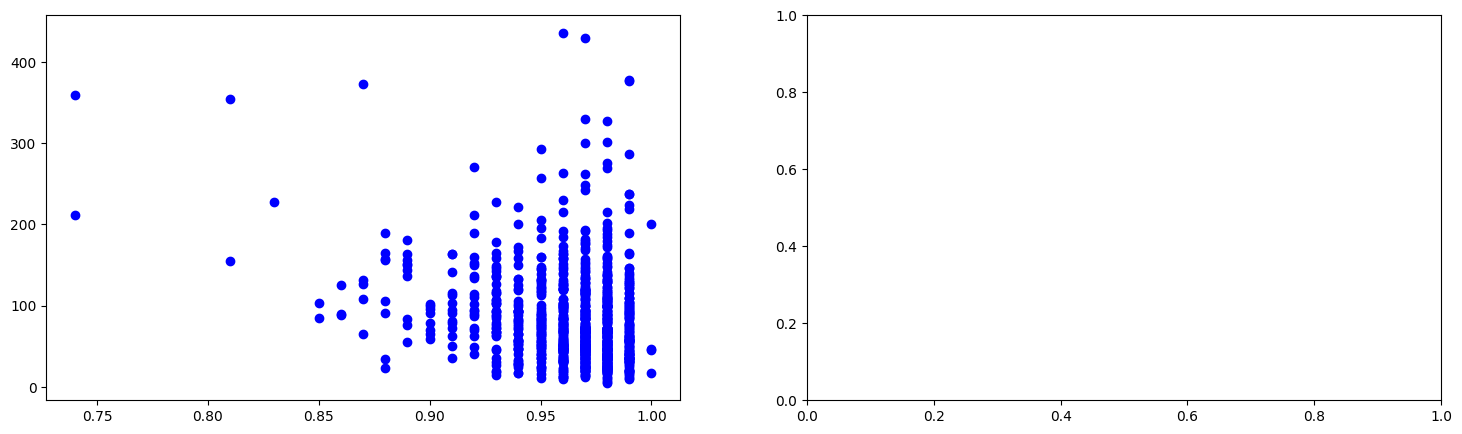

In [5]:
import matplotlib.pyplot as plt 

data = pd.read_csv('reddit_v2.csv')

fig, a = plt.subplots(1, 2, figsize = (18, 5))

a[0].scatter(data['upvote_ratio'], data['num_comments'], color='blue')


plt.show()

